In [1]:
#运行所有单元直到运行到最后一个单元时打开http://127.0.0.1:8050/ 然后稍等一会直到显示出所有数据

In [2]:
import pandas as pd
from jupyter_plotly_dash import JupyterDash
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

In [3]:
import dash
from dash.dependencies import Input,Output
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objs as go 

In [4]:
path="./movies.csv"
movies=pd.read_csv(path,encoding='gb18030')
plt.rcParams['font.sans-serif'] = ['KaiTi']
movies.head()

,Unnamed: 0,title,score,img_url,year,nation,category
0,0,肖申克的救赎,9.7,https://img2.doubanio.com/view/photo/s_ratio_p...,1994,美国,犯罪 剧情
1,1,霸王别姬,9.6,https://img3.doubanio.com/view/photo/s_ratio_p...,1993,中国大陆 中国香港,剧情 爱情 同性
2,2,阿甘正传,9.5,https://img2.doubanio.com/view/photo/s_ratio_p...,1994,美国,剧情 爱情
3,3,这个杀手不太冷,9.4,https://img2.doubanio.com/view/photo/s_ratio_p...,1994,法国 美国,剧情 动作 犯罪
4,4,泰坦尼克号,9.4,https://img9.doubanio.com/view/photo/s_ratio_p...,1997,美国 墨西哥 澳大利亚 加拿大,剧情 爱情 灾难


In [5]:
movies.rename(columns={"Unnamed: 0":"num"},inplace=True)
movies.set_index("num",inplace=True)

In [6]:
movies.head()

,title,score,img_url,year,nation,category
num,,,,,,
0,肖申克的救赎,9.7,https://img2.doubanio.com/view/photo/s_ratio_p...,1994,美国,犯罪 剧情
1,霸王别姬,9.6,https://img3.doubanio.com/view/photo/s_ratio_p...,1993,中国大陆 中国香港,剧情 爱情 同性
2,阿甘正传,9.5,https://img2.doubanio.com/view/photo/s_ratio_p...,1994,美国,剧情 爱情
3,这个杀手不太冷,9.4,https://img2.doubanio.com/view/photo/s_ratio_p...,1994,法国 美国,剧情 动作 犯罪
4,泰坦尼克号,9.4,https://img9.doubanio.com/view/photo/s_ratio_p...,1997,美国 墨西哥 澳大利亚 加拿大,剧情 爱情 灾难


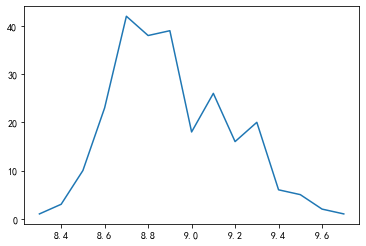

In [7]:
movies_score=movies.groupby("score").size()
plt.plot(movies_score)
plt.show()

In [8]:
nations=movies.nation.unique()

In [9]:
region={}
for nation in nations:
    for w in str(nation).split(sep=" "):
        if w in region:
            region[w]=region[w]+1
        else:
            region[w]=1
region

{'美国': 35,
 '中国大陆': 6,
 '中国香港': 7,
 '法国': 17,
 '墨西哥': 1,
 '澳大利亚': 4,
 '加拿大': 5,
 '意大利': 8,
 '日本': 3,
 '英国': 16,
 '印度': 1,
 '瑞士': 4,
 '德国': 14,
 '韩国': 2,
 '新西兰': 2,
 '黎巴嫩': 1,
 '塞浦路斯': 1,
 '卡塔尔': 1,
 '中国台湾': 6,
 '波兰': 1,
 '西班牙': 4,
 '伊朗': 1,
 '丹麦': 1,
 '瑞典': 2,
 '巴西': 2,
 '荷兰': 1,
 '奥地利': 1,
 '南非': 2,
 '阿根廷': 1,
 '希腊': 1,
 '爱尔兰': 1,
 '泰国': 1,
 '阿联酋': 1,
 '摩纳哥': 1,
 '捷克': 1}

In [10]:
region_pd=pd.Series(data=region)


In [11]:
region_pd=region_pd.sort_values(ascending=False)

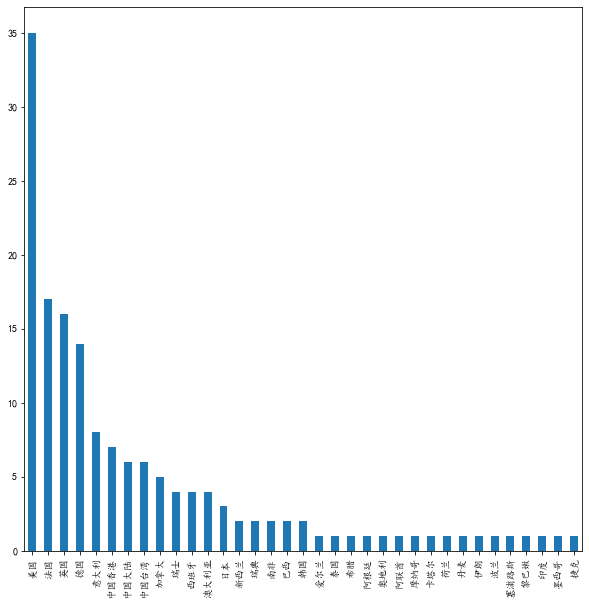

In [12]:
plt.figure(figsize=(10,10))
region_pd.plot(kind="bar")
plt.show()

In [13]:
cates={}
for tags in movies.category:
    for tag in str(tags).split(sep=" "):
        if tag in cates:
            cates[tag]=cates[tag]+1
        else:
            cates[tag]=1

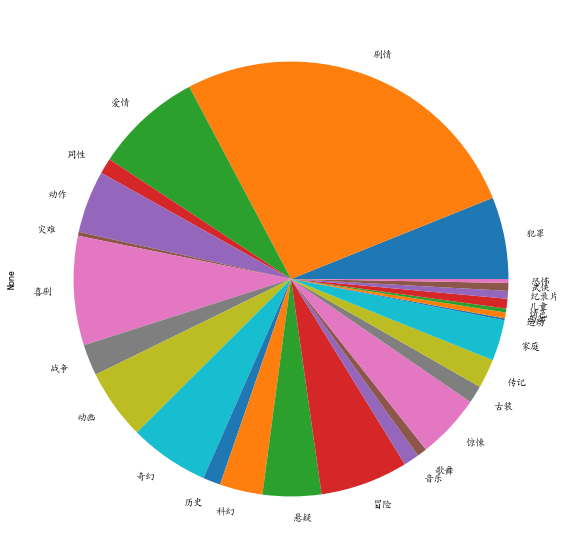

In [14]:
plt.figure(figsize=(10,10))
cates_pd=pd.Series(data=cates)
cates_pd.plot(kind="pie")

In [15]:
movies_year=movies

In [16]:
movies_year.head()

,title,score,img_url,year,nation,category
num,,,,,,
0,肖申克的救赎,9.7,https://img2.doubanio.com/view/photo/s_ratio_p...,1994,美国,犯罪 剧情
1,霸王别姬,9.6,https://img3.doubanio.com/view/photo/s_ratio_p...,1993,中国大陆 中国香港,剧情 爱情 同性
2,阿甘正传,9.5,https://img2.doubanio.com/view/photo/s_ratio_p...,1994,美国,剧情 爱情
3,这个杀手不太冷,9.4,https://img2.doubanio.com/view/photo/s_ratio_p...,1994,法国 美国,剧情 动作 犯罪
4,泰坦尼克号,9.4,https://img9.doubanio.com/view/photo/s_ratio_p...,1997,美国 墨西哥 澳大利亚 加拿大,剧情 爱情 灾难


In [17]:
movies_year.loc[(movies_year.year<"1994") & (movies_year.year>'1989')].sort_values("score",ascending=False)

,title,score,img_url,year,nation,category
num,,,,,,
1,霸王别姬,9.6,https://img3.doubanio.com/view/photo/s_ratio_p...,1993,中国大陆 中国香港,剧情 爱情 同性
7,辛德勒的名单,9.5,https://img2.doubanio.com/view/photo/s_ratio_p...,1993,美国,剧情 历史 战争
44,闻香识女人,9.1,https://img1.doubanio.com/view/photo/s_ratio_p...,1992,美国,剧情
122,完美的世界,9.1,https://img1.doubanio.com/view/photo/s_ratio_p...,1993,美国,剧情 犯罪
78,沉默的羔羊,8.9,https://img1.doubanio.com/view/photo/s_ratio_p...,1991,美国,剧情 犯罪 惊悚
142,教父3,8.9,https://img2.doubanio.com/view/photo/s_ratio_p...,1990,美国,剧情 犯罪
150,喜宴,8.9,https://img1.doubanio.com/view/photo/s_ratio_p...,1993,中国台湾 美国,剧情 喜剧 爱情 同性 家庭
213,牯岭街少年杀人事件,8.9,https://img9.doubanio.com/view/photo/s_ratio_p...,1991,中国台湾,剧情 犯罪
164,纵横四海,8.8,https://img1.doubanio.com/view/photo/s_ratio_p...,1991,中国香港,剧情 喜剧 动作 犯罪


In [18]:
my_font = font_manager.FontProperties(fname=r"C:\Windows\Fonts\msyh.ttc",size=14)

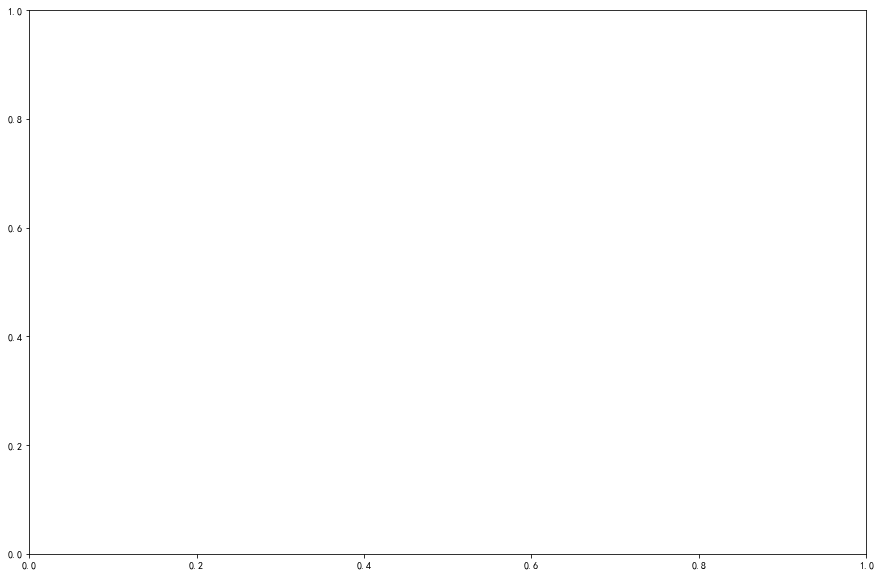

In [19]:

fig,ax=plt.subplots(figsize=(15,10))
def drawPath(year):
    example=movies_year.loc[(movies_year.year<=str(year)) & (movies_year.year>str(year-4))].sort_values("score",ascending=True)
    for sco,n in zip(example.score,example.index):
        example.loc[example.index==n,"score"]=round(example.loc[example.index==n,"score"]-8.0,1)
    ax.clear()
    ax.barh(example["title"],example["score"])
    for i,(score,title) in enumerate(zip(example["score"],example["title"])):
        ax.text(score,i,title,ha='right',fontproperties=my_font)
        ax.text(score,i,f':{score}',ha='left',fontproperties=my_font)
    ax.text(1,0.4,str(year-3)+"至"+str(year),transform=ax.transAxes,size=40,ha='right',fontproperties=my_font)
    # x刻度设置在顶部
    ax.xaxis.set_ticks_position('top')
    # x刻度颜色设置为灰色，大小为12
    ax.tick_params(axis= 'x',colors= '#777777',labelsize= 12)
    # 去掉y刻度
    ax.set_yticks([])
    # 设置 xy轴内边距
    ax.margins(0, 0.01)
    # 显示网格（x轴向虚线）
    ax.grid(which= 'major', axis= 'x',linestyle= '--')
    # 网格线至于底部
    ax.set_axisbelow(True)
    # 在左上角显示 标题（不是用的title方法）
    ax.text(0, 1.06,'每4年上映最佳电影及其评价',transform= ax.transAxes,weight =600,ha = 'left',fontproperties= my_font,size=24)
    # 去掉边框
    plt.box(False)
# drawPath(1990)

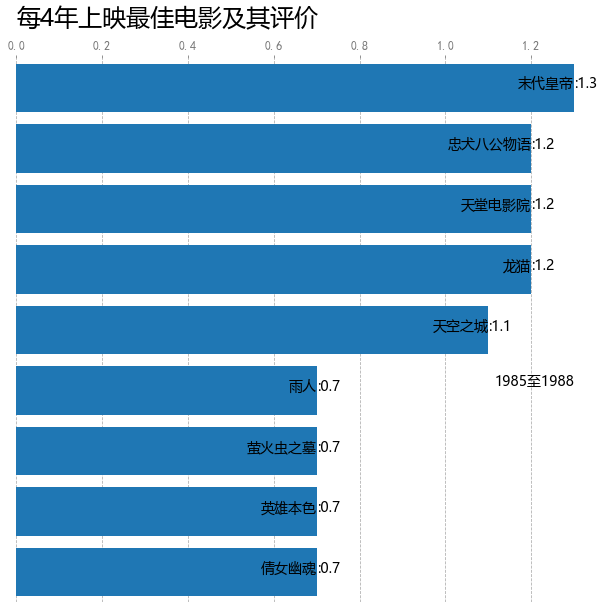

In [20]:
fig,ax=plt.subplots(figsize = (10,10))
animator = FuncAnimation(fig,drawPath,frames=range(1988,2021,4),interval=1000)
HTML(animator.to_jshtml())

In [21]:
def getMarks(start,end):
    t=dict()
    for year in range(start,end):
        try:
            if(year%4==0):
                t[str(year)]=str(year)
        except:
            pass
    return t
# a=getMarks(1988,2021)
# a

In [22]:
 lay={ 'autosize': False,'width': 1500,'height': 500,'margin': { 'l': 50,
    'r': 50,
    'b': 100,
    't': 100,
    'pad': 4
  }
    }


In [23]:
app=dash.Dash("Top Movie250")
app.layout=html.Div(
children=[
    html.H1('最佳电影分数的评价分布',style={"text-align":"center","color":"blue"}),
    dcc.Graph(
    id='G1',
    figure=go.Figure(
        data=[go.Scatter(x=movies_score.index,y=movies_score,name="数量")]
    )
    ),
    html.H1('各地最佳电影的数量',style={"text-align":"center","color":"blue"}),
    dcc.Graph(
    id='G2',
    figure=go.Figure(data=[go.Bar(x=region_pd.index,y=region_pd,name='数量')])
    ),
    html.H1('最佳电影各种类型的占比',style={"text-align":"center","color":"blue"}),
    dcc.Graph(
    id='G3',
    figure=go.Figure(data=go.Pie(labels=cates_pd.index,values=cates_pd,name='占比'),layout=lay)
    ),
    html.H1('每四年出现的最佳电影及其评价（部分）',style={"text-align":"center","color":"blue"}),
    dcc.Graph(id='graph-with-slider'),
    dcc.Slider(
    id="year-slider",
    min=1988,
    max=2021,
    step=None,
    marks=getMarks(1988,2021),
    value=1988
    ),
]
)
@app.callback(
    Output("graph-with-slider","figure"),
    [Input("year-slider","value")]
)
def update_figure(selected_year):
     example=movies_year.loc[(movies_year.year<=str(selected_year)) & (movies_year.year>str(selected_year-4))].sort_values("score",ascending=False)
     for sco,n in zip(example.score,example.index):
        example.loc[example.index==n,"score"]=round(example.loc[example.index==n,"score"]-8.0,1)
     return go.Figure(
        data=[go.Bar(x=example.title,y=example.score,name='数量')]
    )

In [24]:
app.run_server()

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "Top Movie250" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [22/Jun/2021 21:42:13] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/Jun/2021 21:42:14] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [22/Jun/2021 21:42:14] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [22/Jun/2021 21:42:14] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [22/Jun/2021 21:42:18] "POST /_dash-update-component HTTP/1.1" 200 -
